In [1]:
mu1 = 2
sigma1 = 1
pi1 = 0.5

mu2 = 4
sigma2 = 1
pi2 = 0.5

## الف)

$$
    p(x|C_i) = N(\mu_i, \sigma_i) = \frac{1}{\sigma_i \sqrt{2\pi}} e^{-\frac{1}{2}(\frac{x-\mu_i}{\sigma_i})^2}
$$

$$
    g_i(x) = \ln{p(x|C_i)} + \ln{P(C_i)} = -\ln{\sigma_i} -\frac{1}{2}(\frac{x-\mu_i}{\sigma_i})^2 + \ln{P(C_i)}
$$

$$
    g(x) = g_1(x) - g_2(x) = \ln{\frac{\sigma_2}{\sigma_1}} + \frac{1}{2} ((\frac{x-\mu_2}{\sigma_2})^2 - (\frac{x-\mu_1}{\sigma_1})^2) + \ln{\frac{P(C_1)}{P(C_2)}}
$$

In [2]:
import numpy as np

def discriminant_function(x, mu, sigma, prior):
    term1 = -1 * np.log(sigma)
    term2 = -0.5 * ((x - mu) / sigma)**2
    term3 = np.log(prior)
    return term1 + term2 + term3

x = np.linspace(min(mu1 - 2*sigma1, mu2 - 2*sigma2), max(mu1 + 2*sigma1, mu2 + 2*sigma2), 100)
g1 = discriminant_function(x, mu1, sigma1, pi1)
g2 = discriminant_function(x, mu2, sigma2, pi2)
g = g1 - g2

## ب)

$$
    decision \ boundary = \frac{x_i g(x_{i+1}) - x_{i+1} g(x_i)}{g(x_{i+1})-g(x_i)} \quad such \ that \ g(x_i) . g(x_{i+1}) < 0
$$

In [3]:
for i in range(x.size - 1):
    if g[i] * g[i + 1] < 0:
        decision_boundary = (x[i]*g[i+1] - x[i+1]*g[i])/(g[i+1] - g[i])
        print('decision boundary =', decision_boundary)

decision boundary = 3.0


## د)

In [4]:
C1 = np.random.normal(mu1, sigma1, 100)
C2 = np.random.normal(mu2, sigma2, 100)

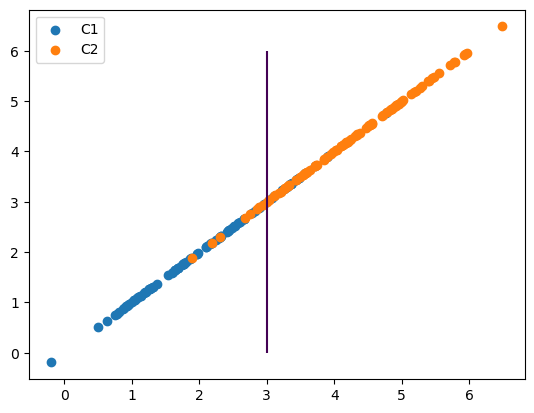

In [5]:
import matplotlib.pyplot as plt

plt.scatter(C1, C1, label="C1")
plt.scatter(C2, C2, label="C2")
plt.contour(x, x, np.tile(g, (len(g), 1)), levels=[0])


plt.legend()
plt.show()

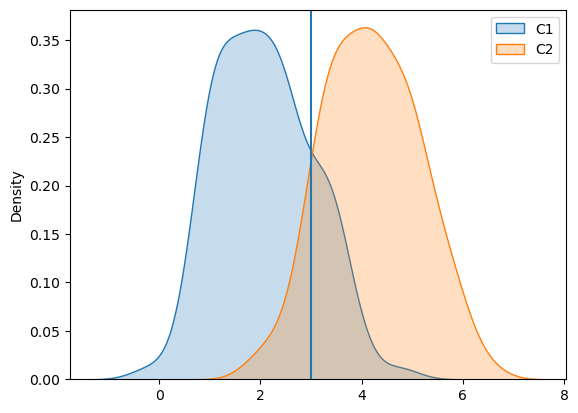

In [6]:
import seaborn as sns

sns.kdeplot(C1, label="C1", fill=True)
sns.kdeplot(C2, label="C2", fill=True)
plt.axvline(decision_boundary)

plt.legend()
plt.show()

## ه)

In [7]:
samples = np.concatenate([C1, C2])
predicted_labels = (samples > decision_boundary).astype(int) + 1
predicted_labels

array([1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2])

In [8]:
T1 = np.sum(C1 < decision_boundary)
T2 = np.sum(C2 > decision_boundary)
F1 = np.sum(C2 < decision_boundary)
F2 = np.sum(C1 > decision_boundary)

print(f'\
\tpredicted\n\
actual\tclass 1\tclass 2\n\
class 1\t{T1}\t{F2}\n\
class 2\t{F1}\t{T2}\
')

	predicted
actual	class 1	class 2
class 1	81	19
class 2	9	91


In [9]:
accuracy = (T1 + T2) / (len(C1) + len(C2))
print(f"Accuracy = {accuracy:.2f}")

precision1, precision2 = T1 / (T1 + F1), T2 / (T2 + F2)
print(f"Precision 1 = {precision1:.2f}\tPrecision 2 = {precision2:.2f}")

recall1, recall2 = T1 / (T1 + F2), T2 / (T2 + F1)
print(f"Recall 1 = {recall1:.2f}\t\tRecall 2 = {recall2:.2f}")

F1_score1 = 2 * precision1 * recall1 / (precision1 + recall1)
F1_score2 = 2 * precision2 * recall2 / (precision2 + recall2)
print(f"F1-score 1 = {F1_score1:.2f}\tF1-score 2 = {F1_score2:.2f}")

Accuracy = 0.86
Precision 1 = 0.90	Precision 2 = 0.83
Recall 1 = 0.81		Recall 2 = 0.91
F1-score 1 = 0.85	F1-score 2 = 0.87


## و)

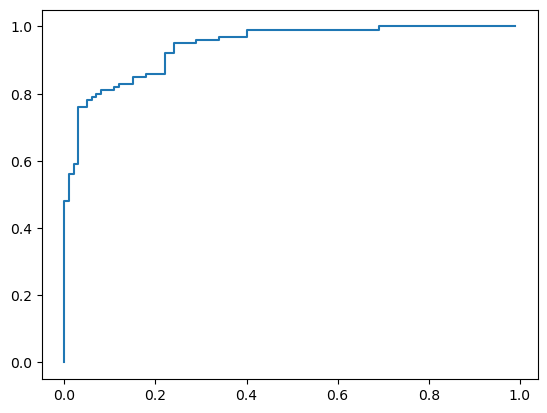

In [10]:
def true_positive(decision_boundary):
    return np.sum(C1 < decision_boundary) / C1.size
def false_positive(decision_boundary):
    return np.sum(C2 < decision_boundary) / C2.size

num_samples = len(samples)
x, y = np.zeros(num_samples), np.zeros(num_samples)
for i, decision_boundary in enumerate(np.sort(samples)):
    x[i] = false_positive(decision_boundary)
    y[i] = true_positive(decision_boundary)

plt.plot(x, y)
plt.show()

In [11]:
print(f"AUROC = {np.trapz(y, x)}")

AUROC = 0.9317


## ز)

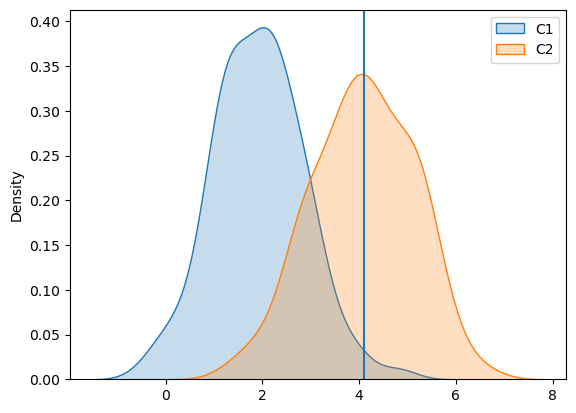

In [12]:
pi1 = 0.9
pi2 = 0.1

C1 = np.random.normal(mu1, sigma1, 100)
C2 = np.random.normal(mu2, sigma2, 100)

x = np.linspace(min(mu1 - 2*sigma1, mu2 - 2*sigma2), max(mu1 + 2*sigma1, mu2 + 2*sigma2), 100)
g1 = discriminant_function(x, mu1, sigma1, pi1)
g2 = discriminant_function(x, mu2, sigma2, pi2)
g = g1 - g2

for i in range(x.size - 1):
    if g[i] * g[i + 1] < 0:
        decision_boundary = (x[i]*g[i+1] - x[i+1]*g[i])/(g[i+1] - g[i])

sns.kdeplot(C1, label="C1", fill=True)
sns.kdeplot(C2, label="C2", fill=True)
plt.axvline(decision_boundary)

plt.legend()
plt.show()

In [13]:
samples = np.concatenate([C1, C2])
predicted_labels = (samples > decision_boundary).astype(int) + 1
predicted_labels

array([1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1,
       2, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1,
       1, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 2, 1, 2,
       2, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2,
       2, 2])

In [14]:
T1 = np.sum(C1 < decision_boundary)
T2 = np.sum(C2 > decision_boundary)
F1 = np.sum(C2 < decision_boundary)
F2 = np.sum(C1 > decision_boundary)

print(f'\
\tpredicted\n\
actual\tclass 1\tclass 2\n\
class 1\t{T1}\t{F2}\n\
class 2\t{F1}\t{T2}\
')

	predicted
actual	class 1	class 2
class 1	99	1
class 2	50	50


In [15]:
accuracy = (T1 + T2) / (len(C1) + len(C2))
print(f"Accuracy = {accuracy:.2f}")

precision1, precision2 = T1 / (T1 + F1), T2 / (T2 + F2)
print(f"Precision 1 = {precision1:.2f}\tPrecision 2 = {precision2:.2f}")

recall1, recall2 = T1 / (T1 + F2), T2 / (T2 + F1)
print(f"Recall 1 = {recall1:.2f}\t\tRecall 2 = {recall2:.2f}")

F1_score1 = 2 * precision1 * recall1 / (precision1 + recall1)
F1_score2 = 2 * precision2 * recall2 / (precision2 + recall2)
print(f"F1-score 1 = {F1_score1:.2f}\tF1-score 2 = {F1_score2:.2f}")

Accuracy = 0.74
Precision 1 = 0.66	Precision 2 = 0.98
Recall 1 = 0.99		Recall 2 = 0.50
F1-score 1 = 0.80	F1-score 2 = 0.66


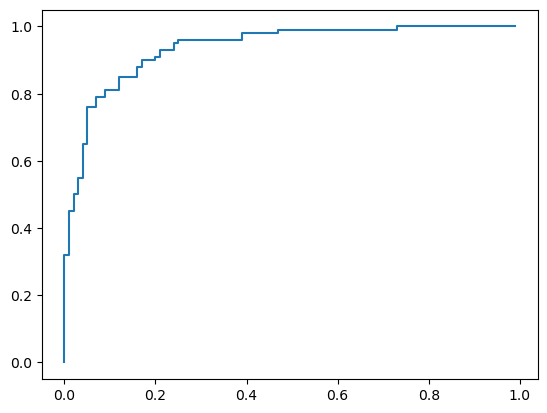

In [16]:
x, y = np.zeros(num_samples), np.zeros(num_samples)
for i, decision_boundary in enumerate(np.sort(samples)):
    x[i] = false_positive(decision_boundary)
    y[i] = true_positive(decision_boundary)

plt.plot(x, y)
plt.show()

In [17]:
print(f"AUROC = {np.trapz(y, x)}")

AUROC = 0.9264999999999999
